# IMPORTING DATA FILES

Download the ZIP file from GitHub:
https://github.com/janmcconnellCityU/Fall_2024_DS625_Team_01/archive/refs/heads/main.zip


In [0]:
%sh
unzip /tmp/Fall_2024_DS625_Team_01_main.zip -d /tmp/Fall_2024_DS625_Team_01_unzipped


Archive:  /tmp/Fall_2024_DS625_Team_01_main.zip
0964ebe111bcb00bf4e4b4cc3c19517b0ca27bbe
   creating: /tmp/Fall_2024_DS625_Team_01_unzipped/Fall_2024_DS625_Team_01-main/
   creating: /tmp/Fall_2024_DS625_Team_01_unzipped/Fall_2024_DS625_Team_01-main/EDA/
   creating: /tmp/Fall_2024_DS625_Team_01_unzipped/Fall_2024_DS625_Team_01-main/EDA/Ean/
  inflating: /tmp/Fall_2024_DS625_Team_01_unzipped/Fall_2024_DS625_Team_01-main/EDA/Ean/DS522_Team_EDA_Ean.ipynb  
   creating: /tmp/Fall_2024_DS625_Team_01_unzipped/Fall_2024_DS625_Team_01-main/EDA/Jan/
  inflating: /tmp/Fall_2024_DS625_Team_01_unzipped/Fall_2024_DS625_Team_01-main/EDA/Jan/DS522_Team_EDA_Jan.ipynb  
   creating: /tmp/Fall_2024_DS625_Team_01_unzipped/Fall_2024_DS625_Team_01-main/EDA/Scott/
  inflating: /tmp/Fall_2024_DS625_Team_01_unzipped/Fall_2024_DS625_Team_01-main/EDA/Scott/DS522_Team_EDA_Scott.ipynb  
  inflating: /tmp/Fall_2024_DS625_Team_01_unzipped/Fall_2024_DS625_Team_01-main/README.md  
   creating: /tmp/Fall_2024_DS625_T

In [0]:
%sh
ls /tmp/Fall_2024_DS625_Team_01_unzipped


Fall_2024_DS625_Team_01-main


In [0]:
dbutils.fs.cp("file:/tmp/Fall_2024_DS625_Team_01_unzipped", "dbfs:/FileStore/Fall_2024_DS625_Team_01/", recurse=True)


True

In [0]:
%fs ls dbfs:/FileStore/Fall_2024_DS625_Team_01/


path,name,size,modificationTime
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/,Fall_2024_DS625_Team_01-main/,0,0
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01_main.zip,Fall_2024_DS625_Team_01_main.zip,243899,1731615966000


# LIST FILES

In [0]:
%fs ls dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data

path,name,size,modificationTime
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/,daphne/,0,0
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/forage/,forage/,0,0
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/hybrid/,hybrid/,0,0
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/kaggle/,kaggle/,0,0


# Identify and preview relevant files

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("FinchEDA").getOrCreate()

# Load and preview some example files
# Example: finch_beaks_1975.csv in the kaggle directory
df_beaks_1975 = spark.read.csv("dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/kaggle/finch_beaks_1975.csv", header=True, inferSchema=True)
df_beaks_1975.show(5)

# Example: GeneticData_structure.csv in the hybrid directory
df_genetic_data = spark.read.csv("dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/hybrid/GeneticData_structure.csv", header=True, inferSchema=True)
df_genetic_data.show(5)

+----+-------+---------------+--------------+
|band|species|Beak length, mm|Beak depth, mm|
+----+-------+---------------+--------------+
|   2| fortis|            9.4|           8.0|
|   9| fortis|            9.2|           8.3|
|  12| fortis|            9.5|           7.5|
|  15| fortis|            9.5|           8.0|
| 305| fortis|           11.5|           9.9|
+----+-------+---------------+--------------+
only showing top 5 rows

+-----+---------+-----------+----+---+----+---+----+---+----+----+----+----+----+----+----+----+----+----+----+----+
|PopID|   Sample|        Pop|Gf01|_c4|Gf03|_c6|Gf04|_c8|Gf05|_c10|Gf06|_c12|Gf07|_c14|Gf11|_c16|Gf12|_c18|Gf13|_c20|
+-----+---------+-----------+----+---+----+---+----+---+----+----+----+----+----+----+----+----+----+----+----+----+
|    1|019-57676|C. parvulus| 177|177| 227|227| 248|248| 205| 205| 174| 174| 283| 283| 180| 180| 171| 171| 157| 157|
|    1|019-57680|C. parvulus| 185|187| 225|235| 248|248| 201| 201| 174| 174| 283| 283| 180| 1

# List files in each folder

In [0]:
folders = [
    "dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne",
    "dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/forage",
    "dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/hybrid",
    "dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/kaggle"
]

for folder in folders:
    print(f"\nListing files in {folder}:")
    display(dbutils.fs.ls(folder))


Listing files in dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne:


path,name,size,modificationTime
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/Fig. 01-06 (also 7.3).csv,Fig. 01-06 (also 7.3).csv,1940,1731616415000
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/Fig. 01-07.csv,Fig. 01-07.csv,1996,1731616421000
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/Fig. 02-01.csv,Fig. 02-01.csv,645,1731616420000
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/Fig. 02-02.csv,Fig. 02-02.csv,1544,1731616420000
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/Fig. 02-09.csv,Fig. 02-09.csv,137,1731616420000
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/Fig. 02-11.csv,Fig. 02-11.csv,355,1731616419000
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/Fig. 02-15.csv,Fig. 02-15.csv,128,1731616414000
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/Fig. 03-01.csv,Fig. 03-01.csv,291,1731616421000
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/Fig. 03-02.csv,Fig. 03-02.csv,371,1731616419000
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/Fig. 03-03 fortis.csv,Fig. 03-03 fortis.csv,18745,1731616420000



Listing files in dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/forage:


path,name,size,modificationTime
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/forage/DRYAD_Darwin_s_finch_foraging_behaviour_and_naris_size.xlsx,DRYAD_Darwin_s_finch_foraging_behaviour_and_naris_size.xlsx,210107,1731616414000



Listing files in dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/hybrid:


path,name,size,modificationTime
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/hybrid/GeneticData_structure.csv,GeneticData_structure.csv,38058,1731616414000
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/hybrid/MaleAgeBirthYearRainfallassigned.csv,MaleAgeBirthYearRainfallassigned.csv,17561,1731616414000



Listing files in dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/kaggle:


path,name,size,modificationTime
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/kaggle/finch_beaks_1975.csv,finch_beaks_1975.csv,8256,1731616426000
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/kaggle/finch_beaks_2012.csv,finch_beaks_2012.csv,5608,1731616425000
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/kaggle/fortis_beak_depth_heredity.csv,fortis_beak_depth_heredity.csv,5881,1731616426000
dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/kaggle/scandens_beak_depth_heredity.csv,scandens_beak_depth_heredity.csv,1850,1731616425000


# Inspect each dataset (looping through each folder)

In [0]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("FinchEDA").getOrCreate()

# Define the base directory path for the data
base_path = "dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data"

# List of subfolders to process
folders = ["daphne", "forage", "hybrid", "kaggle"]

# Loop through each folder and load each CSV file
for folder in folders:
    folder_path = f"{base_path}/{folder}"
    print(f"\n--- Processing files in {folder} folder ---")
    
    # List files in the current folder
    file_list = dbutils.fs.ls(folder_path)
    
    for file_info in file_list:
        file_path = file_info.path
        # Only process CSV files
        if file_path.endswith(".csv"):
            print(f"\nLoading file: {file_path}")
            # Load the CSV file into a Spark DataFrame
            df = spark.read.csv(file_path, header=True, inferSchema=True)
            # Display the first few rows and schema for inspection
            df.show(5)
            df.printSchema()


--- Processing files in daphne folder ---

Loading file: dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/Fig. 01-06 (also 7.3).csv
+----+-------+-----------+----------+----------+--------------+-------------+-------------+
|Year|Species|Beak length|Beak depth|Beak width|CI Beak length|CI Beak depth|CI Beak width|
+----+-------+-----------+----------+----------+--------------+-------------+-------------+
|1973| fortis|      10.76|      9.48|      8.69|         0.097|         0.13|        0.081|
|1974| fortis|      10.72|      9.42|      8.66|         0.144|         0.17|        0.112|
|1975| fortis|      10.57|      9.19|      8.55|         0.075|        0.084|        0.057|
|1976| fortis|      10.64|      9.23|      8.58|         0.048|        0.053|        0.039|
|1977| fortis|      10.73|      9.35|      8.63|         0.085|        0.092|        0.066|
+----+-------+-----------+----------+----------+--------------+-------------+-------------+
only sh

# EDA

Step 1: Standardize column names

In [0]:
from pyspark.sql.functions import col
import re

# Function to standardize column names
def standardize_column_names(df):
    new_columns = [re.sub(r'\s+', '_', col_name.lower().replace(',', '')) for col_name in df.columns]
    for old_col, new_col in zip(df.columns, new_columns):
        df = df.withColumnRenamed(old_col, new_col)
    return df

Step 2: Handle missing values

In [0]:
# Drop rows with more than a threshold of null values
def drop_missing_values(df, threshold=0.5):
    return df.dropna(thresh=int(threshold * len(df.columns)))

# Fill null values in specific columns with 0 or another method
def fill_missing_values(df, column_fill_values=None):
    if column_fill_values:
        for col_name, fill_value in column_fill_values.items():
            df = df.fillna({col_name: fill_value})
    return df

Step 3: Align schemas, ensuring numeric columns are correctly typed

In [0]:
from pyspark.sql.types import DoubleType, IntegerType

def cast_column_types(df, type_mappings):
    for col_name, col_type in type_mappings.items():
        df = df.withColumn(col_name, col(col_name).cast(col_type))
    return df

Step 4: Filter data by criteria

In [0]:
def filter_data(df, species=None, year_range=None):
    if species:
        df = df.filter(col("species").isin(species))
    if year_range:
        df = df.filter((col("year") >= year_range[0]) & (col("year") <= year_range[1]))
    return df

Step 5: Apply cleaning and EDA steps on each file

In [0]:
from pyspark.sql import DataFrame

# Define standard processing pipeline for a given DataFrame
def process_file(df: DataFrame, column_types=None, column_fill_values=None, species=None, year_range=None):
    df = standardize_column_names(df)                     # Standardize column names
    df = cast_column_types(df, column_types or {})        # Cast column types as needed
    df = drop_missing_values(df, threshold=0.5)           # Drop rows with too many missing values
    df = fill_missing_values(df, column_fill_values)      # Fill specific columns with defaults
    df = filter_data(df, species=species, year_range=year_range)  # Filter by species or years
    return df

# Example usage for files in the `daphne` folder
# Adjust column_types and column_fill_values per file based on the initial schema inspection
daphne_files = [
    "dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/Fig. 01-06 (also 7.3).csv",
    "dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/Fig. 01-07.csv",
    # Add other file paths as needed
]

# Process each file
for file_path in daphne_files:
    print(f"Processing file: {file_path}")
    df = spark.read.option("header", "true").csv(file_path)
    
    # Define specific column types, fill values, or filters for each file
    column_types = {"year": IntegerType(), "beak_length": DoubleType(), "beak_depth": DoubleType()}
    column_fill_values = {"beak_length": 0.0, "beak_depth": 0.0}
    species_filter = ["fortis", "scandens"]
    year_range_filter = (1973, 1980)
    
    df = process_file(df, column_types=column_types, column_fill_values=column_fill_values, species=species_filter, year_range=year_range_filter)
    
    # Display the processed data for verification
    df.show(5)

Processing file: dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/Fig. 01-06 (also 7.3).csv
+----+-------+-----------+----------+----------+--------------+-------------+-------------+
|year|species|beak_length|beak_depth|beak_width|ci_beak_length|ci_beak_depth|ci_beak_width|
+----+-------+-----------+----------+----------+--------------+-------------+-------------+
|1973| fortis|      10.76|      9.48|      8.69|         0.097|         0.13|        0.081|
|1974| fortis|      10.72|      9.42|      8.66|         0.144|         0.17|        0.112|
|1975| fortis|      10.57|      9.19|      8.55|         0.075|        0.084|        0.057|
|1976| fortis|      10.64|      9.23|      8.58|         0.048|        0.053|        0.039|
|1977| fortis|      10.73|      9.35|      8.63|         0.085|        0.092|        0.066|
+----+-------+-----------+----------+----------+--------------+-------------+-------------+
only showing top 5 rows

Processing file: dbfs:/

CREATE DF1 AND DF2

In [0]:
# Define df1 and df2 by loading the actual datasets
df1 = spark.read.csv("dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/Fig. 01-06 (also 7.3).csv", header=True, inferSchema=True)
df2 = spark.read.csv("dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/daphne/Fig. 01-07.csv", header=True, inferSchema=True)

# Verify the schema and data
df1.printSchema()
df1.show(5)
df2.printSchema()
df2.show(5)

root
 |-- Year: string (nullable = true)
 |-- Species: string (nullable = true)
 |-- Beak length: string (nullable = true)
 |-- Beak depth: double (nullable = true)
 |-- Beak width: double (nullable = true)
 |-- CI Beak length: double (nullable = true)
 |-- CI Beak depth: double (nullable = true)
 |-- CI Beak width: double (nullable = true)

+----+-------+-----------+----------+----------+--------------+-------------+-------------+
|Year|Species|Beak length|Beak depth|Beak width|CI Beak length|CI Beak depth|CI Beak width|
+----+-------+-----------+----------+----------+--------------+-------------+-------------+
|1973| fortis|      10.76|      9.48|      8.69|         0.097|         0.13|        0.081|
|1974| fortis|      10.72|      9.42|      8.66|         0.144|         0.17|        0.112|
|1975| fortis|      10.57|      9.19|      8.55|         0.075|        0.084|        0.057|
|1976| fortis|      10.64|      9.23|      8.58|         0.048|        0.053|        0.039|
|1977| forti

Standardizing column names and converting data types to numerical columns

In [0]:
from pyspark.sql.functions import col

# Standardize column names and data types for df1
df1 = df1.withColumnRenamed("Year", "year") \
         .withColumnRenamed("Species", "species") \
         .withColumnRenamed("Beak length", "beak_length") \
         .withColumnRenamed("Beak depth", "beak_depth") \
         .withColumnRenamed("Beak width", "beak_width") \
         .withColumnRenamed("CI Beak length", "ci_beak_length") \
         .withColumnRenamed("CI Beak depth", "ci_beak_depth") \
         .withColumnRenamed("CI Beak width", "ci_beak_width") \
         .withColumn("beak_length", col("beak_length").cast("double"))

# Standardize column names for df2
df2 = df2.withColumnRenamed("Year", "year") \
         .withColumnRenamed("Species", "species") \
         .withColumnRenamed("Beak length", "beak_length") \
         .withColumnRenamed("Beak depth", "beak_depth") \
         .withColumnRenamed("Beak width", "beak_width") \
         .withColumnRenamed("CI Beak length", "ci_beak_length") \
         .withColumnRenamed("CI Beak depth", "ci_beak_depth") \
         .withColumnRenamed("CI beak width", "ci_beak_width") \
         .withColumn("ci_beak_length", col("ci_beak_length").cast("double")) \
         .withColumn("ci_beak_depth", col("ci_beak_depth").cast("double")) \
         .withColumn("ci_beak_width", col("ci_beak_width").cast("double"))

# Verify the schemas and data to ensure consistency
df1.printSchema()
df1.show(5)
df2.printSchema()
df2.show(5)

root
 |-- year: string (nullable = true)
 |-- species: string (nullable = true)
 |-- beak_length: double (nullable = true)
 |-- beak_depth: double (nullable = true)
 |-- beak_width: double (nullable = true)
 |-- ci_beak_length: double (nullable = true)
 |-- ci_beak_depth: double (nullable = true)
 |-- ci_beak_width: double (nullable = true)

+----+-------+-----------+----------+----------+--------------+-------------+-------------+
|year|species|beak_length|beak_depth|beak_width|ci_beak_length|ci_beak_depth|ci_beak_width|
+----+-------+-----------+----------+----------+--------------+-------------+-------------+
|1973| fortis|      10.76|      9.48|      8.69|         0.097|         0.13|        0.081|
|1974| fortis|      10.72|      9.42|      8.66|         0.144|         0.17|        0.112|
|1975| fortis|      10.57|      9.19|      8.55|         0.075|        0.084|        0.057|
|1976| fortis|      10.64|      9.23|      8.58|         0.048|        0.053|        0.039|
|1977| forti

# Summary Statistics

In [0]:
# Show summary statistics for numerical columns
df1.describe(["beak_length", "beak_depth", "beak_width"]).show()
df2.describe(["beak_length", "beak_depth", "beak_width"]).show()

+-------+-------------------+-------------------+-------------------+
|summary|        beak_length|         beak_depth|         beak_width|
+-------+-------------------+-------------------+-------------------+
|  count|                 40|                 40|                 40|
|   mean| 10.767499999999997|  9.197749999999997|  8.632749999999998|
| stddev|0.23604378124972175|0.37985481369489044|0.18892390952376292|
|    min|              10.28|               8.51|               8.27|
|    max|              11.11|               9.81|               8.93|
+-------+-------------------+-------------------+-------------------+

+-------+------------------+-------------------+------------------+
|summary|       beak_length|         beak_depth|        beak_width|
+-------+------------------+-------------------+------------------+
|  count|                40|                 40|                40|
|   mean|13.896999999999997|  9.118999999999996| 8.629499999999998|
| stddev|0.4987790220333172|0

# Distribution Analysis

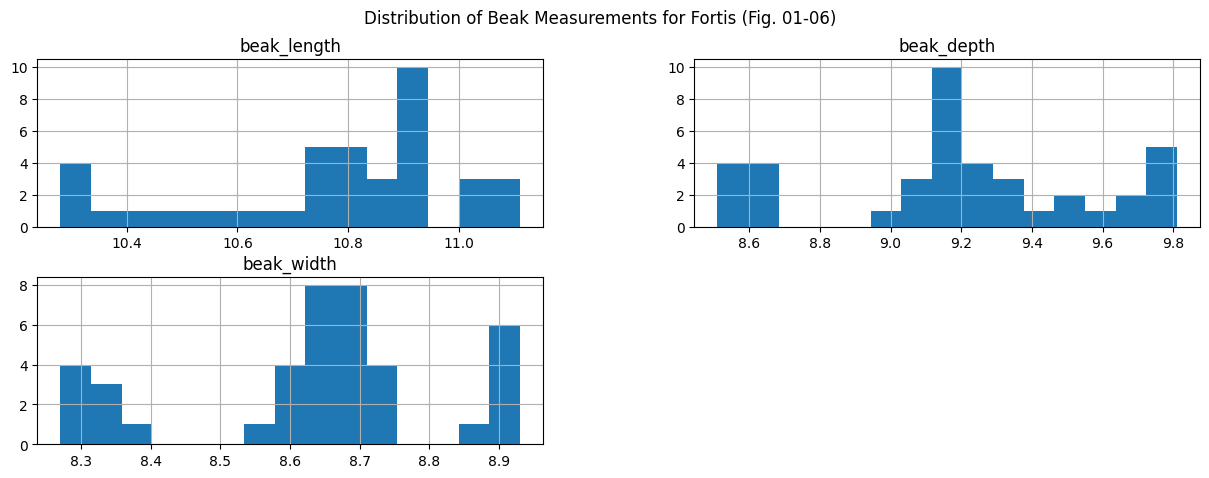

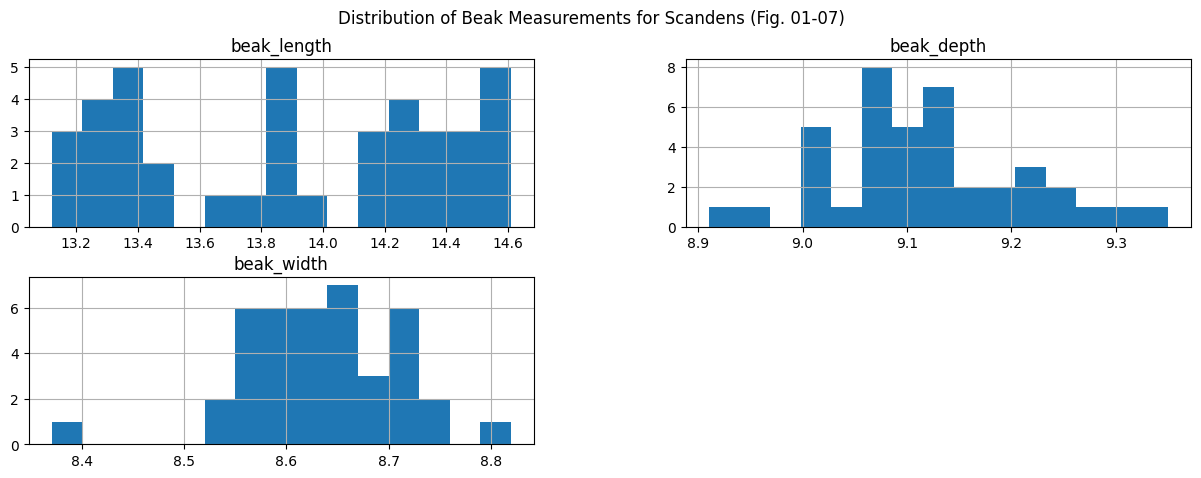

In [0]:
import matplotlib.pyplot as plt

# Convert to pandas for plotting if data size allows
df1_pd = df1.select("beak_length", "beak_depth", "beak_width").toPandas()
df2_pd = df2.select("beak_length", "beak_depth", "beak_width").toPandas()

# Plot histograms for each measurement in df1
df1_pd.hist(bins=15, figsize=(15, 5))
plt.suptitle("Distribution of Beak Measurements for Fortis (Fig. 01-06)")
plt.show()

# Plot histograms for each measurement in df2
df2_pd.hist(bins=15, figsize=(15, 5))
plt.suptitle("Distribution of Beak Measurements for Scandens (Fig. 01-07)")
plt.show()

# Time-Series Trends

+----+---------------+--------------+--------------+
|Year|beak_length_avg|beak_depth_avg|beak_width_avg|
+----+---------------+--------------+--------------+
|NULL|           NULL|          NULL|          NULL|
|    |           NULL|          NULL|          NULL|
|1973|          10.76|          9.48|          8.69|
|1974|          10.72|          9.42|          8.66|
|1975|          10.57|          9.19|          8.55|
|1976|          10.64|          9.23|          8.58|
|1977|          10.73|          9.35|          8.63|
|1978|          11.04|          9.74|          8.86|
|1979|          11.07|          9.78|          8.73|
|1980|          11.11|          9.81|           8.9|
|1981|          11.04|          9.75|          8.89|
|1982|          11.06|           9.8|          8.91|
|1983|          11.03|          9.71|          8.92|
|1984|          10.93|          9.66|          8.93|
|1985|          10.91|          9.62|          8.91|
|1986|          10.91|          9.48|         

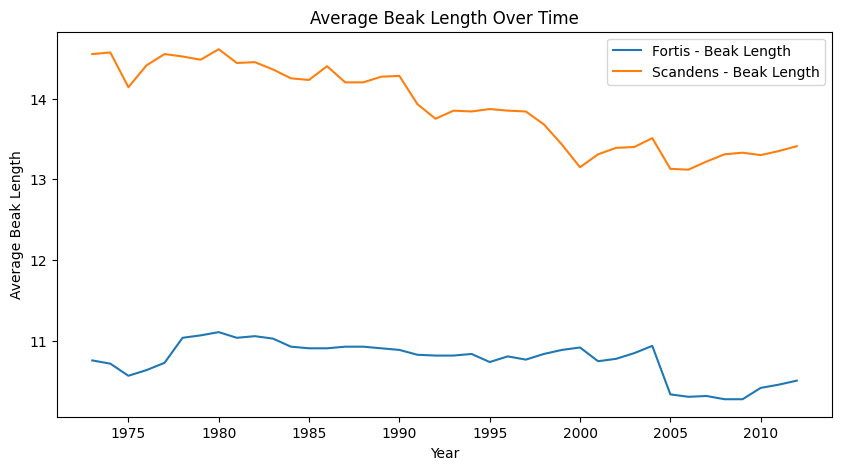

In [0]:
import pandas as pd

# Average measurements per year for df1 and df2
df1_avg = df1.groupBy("Year").avg("beak_length", "beak_depth", "beak_width").orderBy("Year")
df2_avg = df2.groupBy("Year").avg("beak_length", "beak_depth", "beak_width").orderBy("Year")

# Rename columns for clarity
df1_avg = df1_avg.withColumnRenamed("avg(beak_length)", "beak_length_avg") \
                 .withColumnRenamed("avg(beak_depth)", "beak_depth_avg") \
                 .withColumnRenamed("avg(beak_width)", "beak_width_avg")
df2_avg = df2_avg.withColumnRenamed("avg(beak_length)", "beak_length_avg") \
                 .withColumnRenamed("avg(beak_depth)", "beak_depth_avg") \
                 .withColumnRenamed("avg(beak_width)", "beak_width_avg")

# Show results for inspection
df1_avg.show()
df2_avg.show()

# Convert to pandas for plotting and drop any rows with None values
df1_avg_pd = df1_avg.toPandas().dropna(subset=["Year", "beak_length_avg"])
df2_avg_pd = df2_avg.toPandas().dropna(subset=["Year", "beak_length_avg"])

# Convert 'Year' to numeric to ensure proper plotting
df1_avg_pd["Year"] = pd.to_numeric(df1_avg_pd["Year"], errors='coerce')
df2_avg_pd["Year"] = pd.to_numeric(df2_avg_pd["Year"], errors='coerce')

# Drop any rows where 'Year' couldn't be converted to numeric (NaN values)
df1_avg_pd = df1_avg_pd.dropna(subset=["Year"])
df2_avg_pd = df2_avg_pd.dropna(subset=["Year"])

# Plotting trends over time
plt.figure(figsize=(10, 5))
plt.plot(df1_avg_pd["Year"], df1_avg_pd["beak_length_avg"], label="Fortis - Beak Length")
plt.plot(df2_avg_pd["Year"], df2_avg_pd["beak_length_avg"], label="Scandens - Beak Length")
plt.xlabel("Year")
plt.ylabel("Average Beak Length")
plt.legend()
plt.title("Average Beak Length Over Time")
plt.show()

# Comparing Species

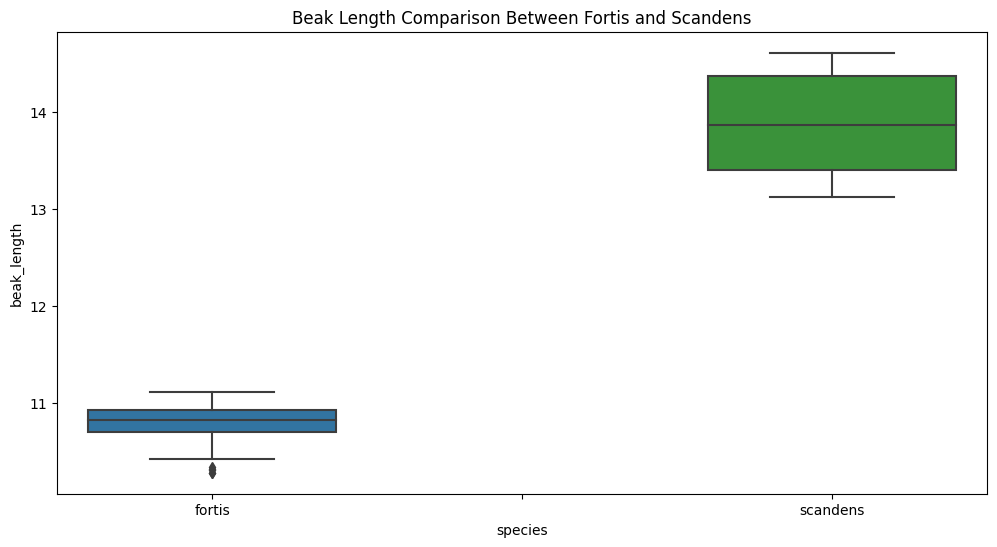

In [0]:
import seaborn as sns

# Combine dataframes for species comparison
df_combined = df1.unionByName(df2)
df_combined_pd = df_combined.select("species", "beak_length", "beak_depth", "beak_width").toPandas()

# Box plot comparison
plt.figure(figsize=(12, 6))
sns.boxplot(x="species", y="beak_length", data=df_combined_pd)
plt.title("Beak Length Comparison Between Fortis and Scandens")
plt.show()

# Visualize Confidence Intervals

In [0]:
print(df1_avg_pd.columns)
print(df2_avg_pd.columns)

Index(['Year', 'beak_length_avg', 'beak_depth_avg', 'beak_width_avg'], dtype='object')
Index(['Year', 'beak_length_avg', 'beak_depth_avg', 'beak_width_avg'], dtype='object')


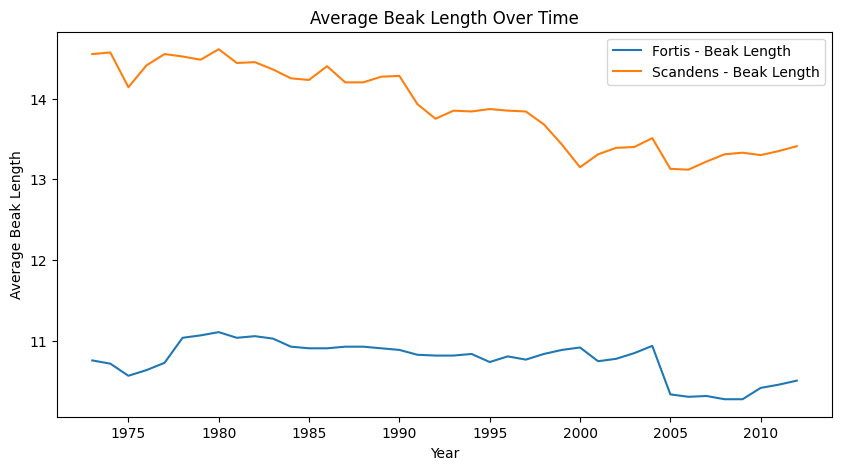

In [0]:
# Plot without CI as placeholders, or if CI data becomes available, you may use it
plt.figure(figsize=(10, 5))
plt.plot(df1_avg_pd["Year"], df1_avg_pd["beak_length_avg"], label="Fortis - Beak Length")
plt.plot(df2_avg_pd["Year"], df2_avg_pd["beak_length_avg"], label="Scandens - Beak Length")
plt.xlabel("Year")
plt.ylabel("Average Beak Length")
plt.legend()
plt.title("Average Beak Length Over Time")
plt.show()

In [0]:
# Check unique species in df1
unique_species_df1 = df1.select("Species").distinct().show()

# Check unique species in df2
unique_species_df2 = df2.select("Species").distinct().show()


+-------+
|Species|
+-------+
|   NULL|
| fortis|
|       |
+-------+

+--------+
| Species|
+--------+
|    NULL|
|scandens|
|        |
+--------+



# EXAMINING THE EXCEL WORKBOOK IN THE FORAGE FOLDER

In [0]:
%pip install openpyxl

  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/c0/da/977ded879c29cbd04de313843e76868e6e13408a94ed6b987245dc7c8506/openpyxl-3.1.5-py2.py3-none-any.whl.metadata
  Obtaining dependency information for et-xmlfile from https://files.pythonhosted.org/packages/c1/8b/5fe2cc11fee489817272089c4203e679c63b570a5aaeb18d852ae3cbba6a/et_xmlfile-2.0.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/250.9 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 143.4/250.9 kB 4.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
import pandas as pd

# Define the path using Databricks utilities to read the file correctly
excel_path = "dbfs:/FileStore/Fall_2024_DS625_Team_01/Fall_2024_DS625_Team_01-main/data/forage/DRYAD_Darwin_s_finch_foraging_behaviour_and_naris_size.xlsx"

# Use dbutils to copy the file to the local driver for access
local_path = "/tmp/DRYAD_Darwin_s_finch_foraging_behaviour_and_naris_size.xlsx"
dbutils.fs.cp(excel_path, f"file:{local_path}")

# Load the Excel file from the local path
excel_data = pd.read_excel(local_path, sheet_name=None)

# Display sheet names and preview data in each sheet
print("Sheet names:", excel_data.keys())

for sheet, data in excel_data.items():
    print(f"\nData from sheet '{sheet}':")
    display(data.head())

Sheet names: dict_keys(['Sheet1', 'Sheet2'])

Data from sheet 'Sheet1':


Island,Genus,species,Species_Cat,Habitat,Year,"Sex(male=0,fem=1,unk=99)",Male Color(0-5)_during_Foraging,"Substrate_Cat(1=live bark,2=dead bark,3=green leaf,4=dead leaf,5=ground,6=grass,7=moss,8=lichen,9=flower,10=fruit,11=air)","Technique_Cat(1=glean,2=peck,3=bite+grasp,4=probe,5=pry,6=chipoff)","Food_Cat(1=plant,2=invertebrate,3=seed,4=unknown)","Substrate_Cat_FEW(1=foliage,2=bark,3=flower,4=ground,5=fruit, 6=moss)","Technique_Cat_FEW(1=glean,pick,bite; 2=probe,pry,chip-off)",Ring_Number,Naris_Cat(1=normal ≤ 2 mm; 2=enlarged > 2 mm),Bill_Lgth_Head,Bill_Lgth_Fth,Bill_Lgth_Nostril,Naris_L,Naris_R,Naris_Max,Bill_Depth,Bill_Width,Tarsus,Tail,Wing,Mass,%NarisMAX_relative_to_BillLgthFth
Floreana,Camarhynchus,hybrid,2,Scalesia forest highlands,2019,0,5.0,9,4,1,3,2,019-57681,2.0,27.1,14.0,7.4,2.7,2.5,2.7,8.0,6.7,22.1,45.0,66.0,13.3,19.28571428571429
Floreana,Camarhynchus,parvulus,1,Scalesia forest highlands,2013,0,null,4,1,4,1,1,019-57683,1.0,25.0,12.7,7.0,1.9,1.8,1.9,6.9,6.0,18.4,34.0,57.0,12.1,14.960629921259844
Floreana,Camarhynchus,parvulus,1,Scalesia forest highlands,2013,0,null,1,1,4,2,1,019-57690,1.0,26.1,13.0,7.6,1.9,1.2,1.9,7.6,6.6,20.2,38.0,63.0,13.1,14.615384615384613
Floreana,Camarhynchus,parvulus,1,Scalesia forest highlands,2013,0,null,3,1,4,1,1,019-57690,1.0,26.1,13.0,7.6,1.9,1.2,1.9,7.6,6.6,20.2,38.0,63.0,13.1,14.615384615384613
Floreana,Geospiza,fuliginosa,4,Scalesia forest highlands,2019,0,5.0,3,1,2,1,1,019-57691,1.0,28.6,15.2,9.1,1.5,1.7,1.7,7.0,6.1,19.1,39.0,63.0,14.6,11.18421052631579



Data from sheet 'Sheet2':


Island,"Galapagos Archipelago, Floreana Island"
Genus,Genus of Darwin's finch
species,Species of Darwin's finch
Species_Cat,"1=small tree finch, 2=hybrid tree finch, 3=medium tree finch, 4=small ground finch"
Habitat,0=arid lowlands 0=100 masl; 1 = Scalesia forest highlands 300-400 masl
Year,Year


# Given the original project description:
- **Beak Measurements and Evolution:** The files containing beak length, depth, and width data for different finch species over time are crucial. These files help analyze morphological changes and potential evolutionary trends in the finch population. This is directly relevant if the goal is to track changes in physical traits due to environmental factors.
- **Foraging Behavior and Naris Size:** The foraging behavior and naris (nostril/nasal opening) size Excel workbook includes behavioral data and naris size measurements, which could be useful if the project focuses on foraging behavior and adaptations. If the description includes studying environmental impact on feeding behaviors or adaptations, this file is relevant.
- **Environmental and Habitat Data:** Any files or columns that provide habitat or island data (like in the Excel workbook) can support analyses on how different environments or islands influence traits or behaviors. This data helps contextualize other variables with environmental factors.
- **Confidence Intervals:** If the project includes statistical analyses, files with confidence intervals for measurements, like beak length, depth, and width, are valuable. These intervals support confidence in trend assessments and comparisons between species or over time.
- **Species-specific Comparisons:** If the project description includes species comparisons, the files with species identifiers and data on different morphological and behavioral metrics will be useful.

Based on these factors, the following files will be instrumental in achieving the project goals:
- **Beak measurements file (e.g., Fig. 01-06.csv, Fig. 01-07.csv):** For tracking morphological changes.
- **Foraging behavior and naris size Excel workbook:** For insights into behavioral adaptations.
- **Environmental/habitat data in the Excel workbook:** To assess how environment influences adaptations.
- **Files with confidence interval data:** For robust trend analysis and species comparisons.